### Decision Support System opening long term deposit

Import libraries

In [94]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split

loading data

In [95]:
print(os.listdir()) #list files in the current directory
df=pd.read_csv('bank-additional-full.csv', sep=';')



['Assign_telemarketing.ipynb', 'bank-additional-full.csv', 'Data', 'features.xlsx', 'ideas.docx', 'Terms']


Descriptive analysis

In [96]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [98]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [99]:
print("Continuous Variables","\n")
continous_vars=df.describe().columns  #get the names of numerical variables, in this case continuous variables
print(continous_vars)

Continuous Variables 

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [100]:
print("Categorical Variables","\n")
categorical_vars=df.describe(include=[object]).columns
print(categorical_vars)

Categorical Variables 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


Vizualizing variables

Continuous Variables Visualization 



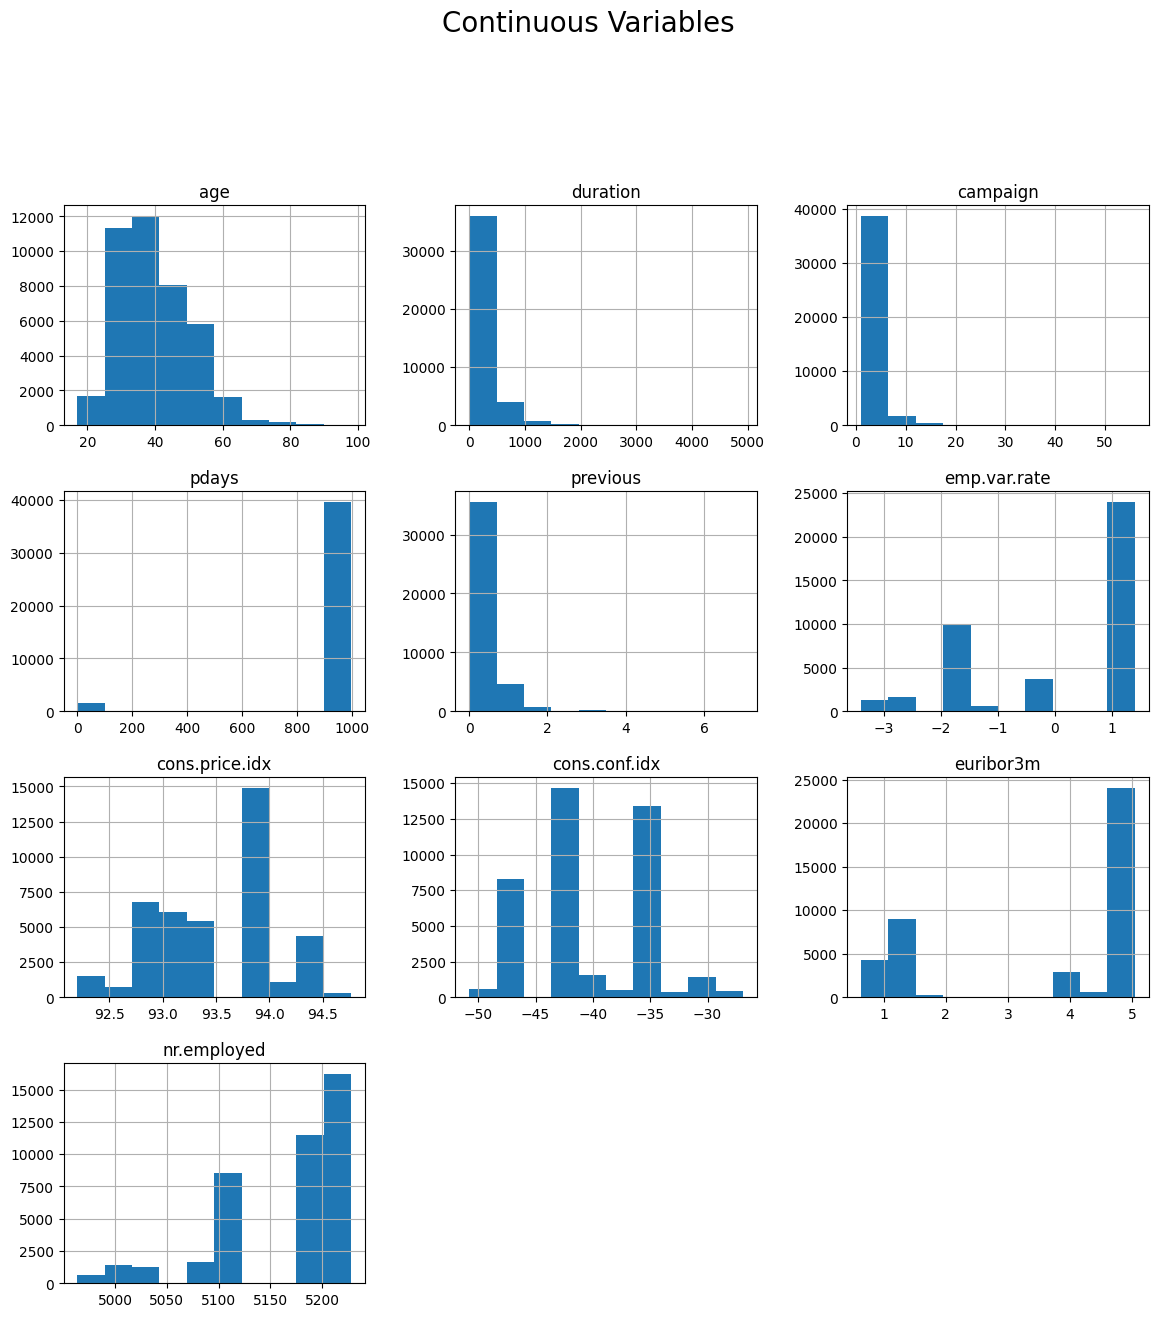

In [84]:
print("Continuous Variables Visualization","\n")

df.hist(column=continous_vars,figsize=(14,14))
plt.suptitle("Continuous Variables", fontsize=20, y=1.02)
plt.show()

Categorical Variables Visualization 



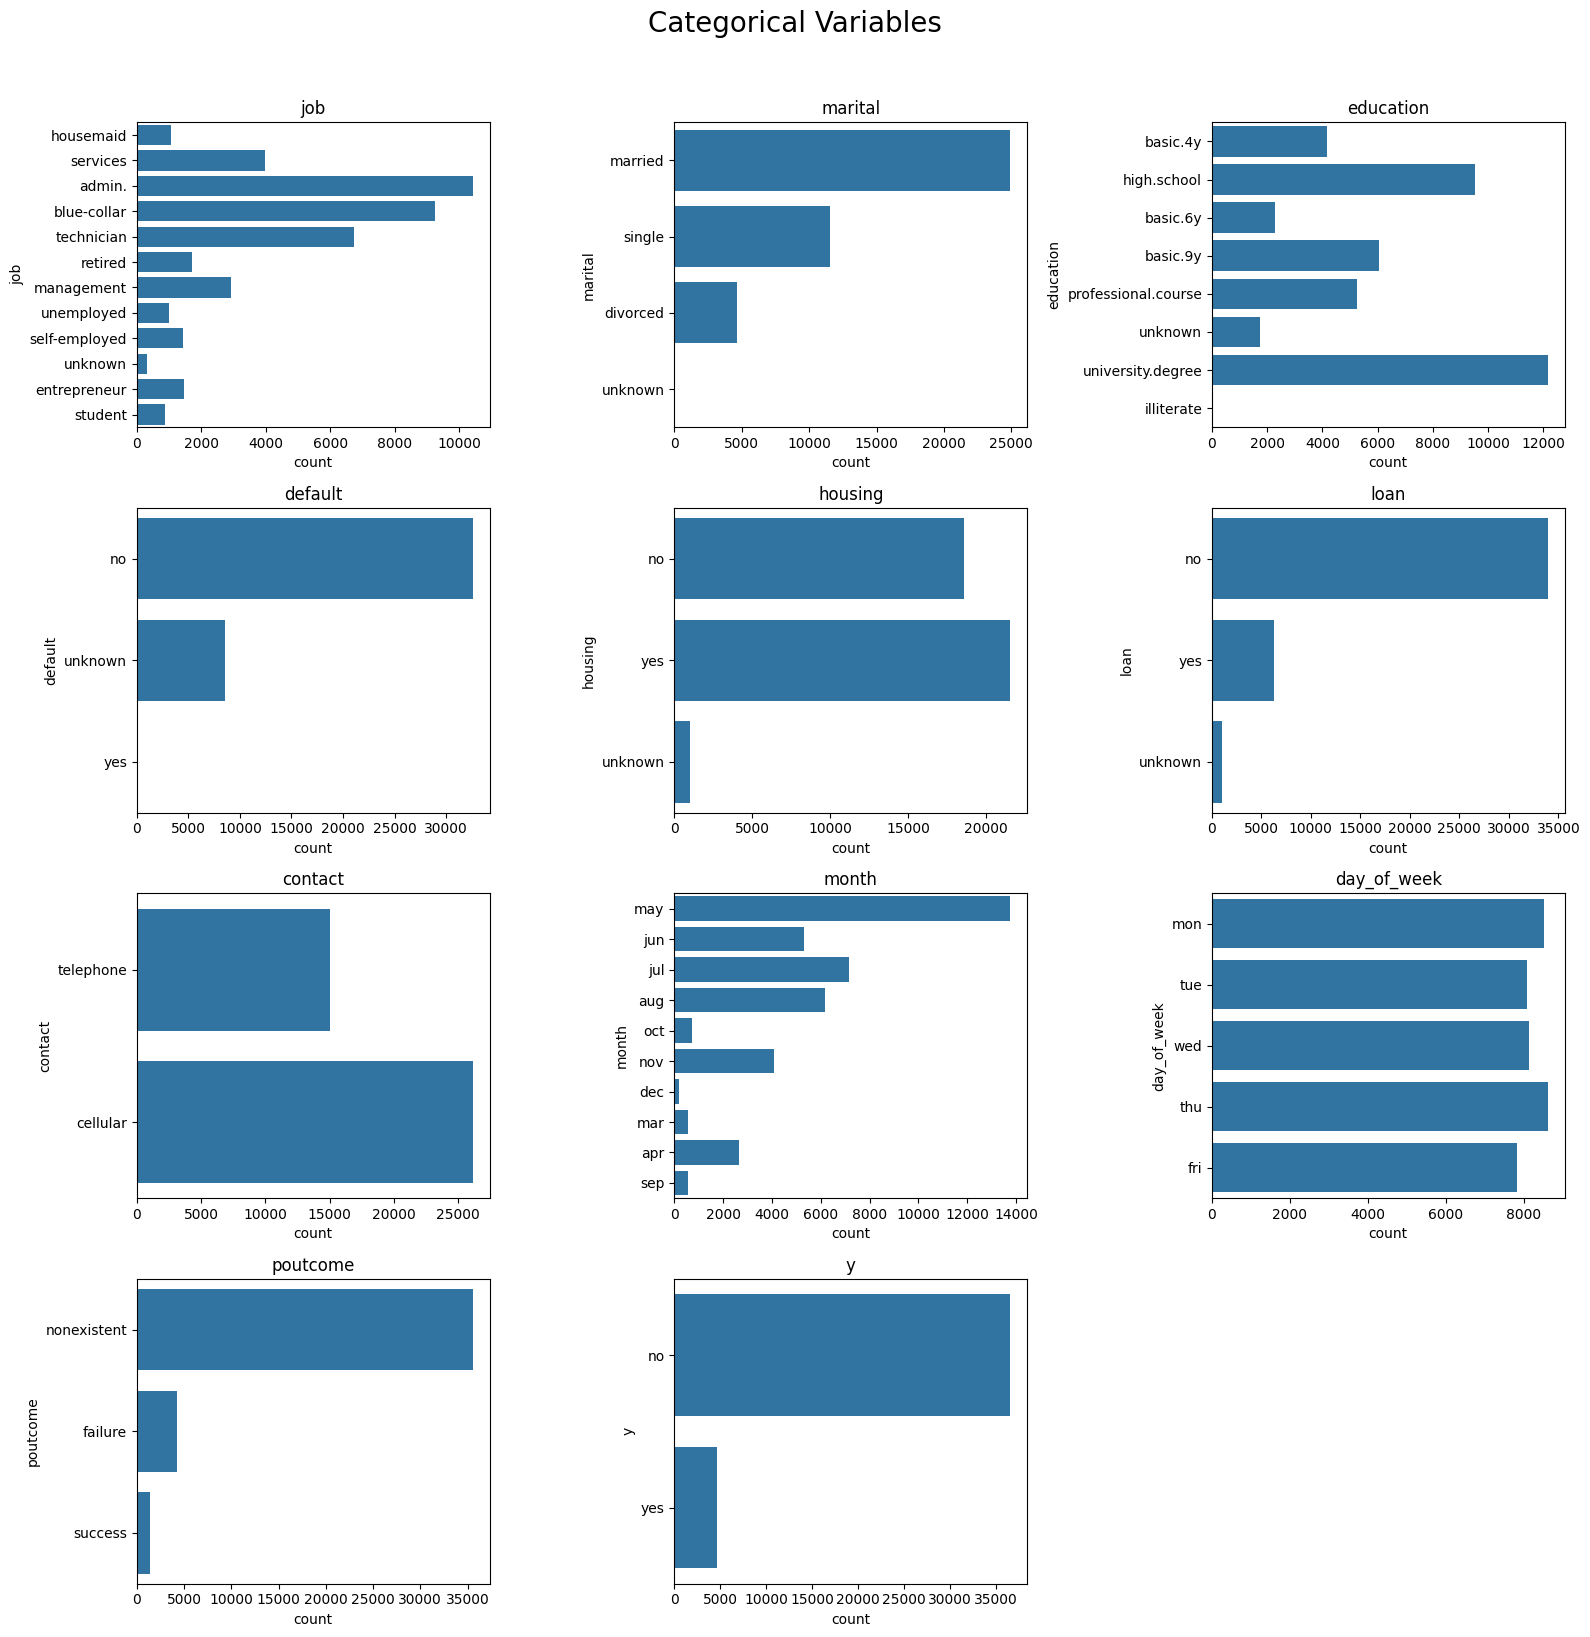

In [85]:
print("Categorical Variables Visualization","\n")
n = len(categorical_vars) # number of categorical variables

cols = 3
rows = math.ceil(n / cols) # automatically determine rows and columns

plt.figure(figsize=(16, rows * 4))

plt.suptitle("Categorical Variables", fontsize=20, y=1.02)

for i, col in enumerate(categorical_vars, start=1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

Data Manipulation

We have numeric attribute named pdays means that number of days that passed by after the client was last contacted from a previous campaign (There are 999 and other numeric values inside of this column. 999 means client was not previously contacted. We converted the ‘pdays’ column numeric to categorical. If the value is equal to 999, we put the ‘0’ instead of ‘999’, otherwise we put 1. We dropped the regular ‘pdays’ column and set column name as ‘pdays_cat’

In [101]:
   
df["pdays_cat"]=[0 if each==999  else 1 for each in df.pdays]  # to convert pdays column numeric to categorical 
df=df.drop(["pdays"],axis=1)
df["pdays_cat"] = df["pdays_cat"].astype("object") # change datatype to categorical

Duration column/attribute highly affects the output target, we also dropped the Duration column. Because, the duration is not known before a call is performed.

In [102]:
df=df.drop(["duration"],axis=1)

Correlation

Correlation Matrix



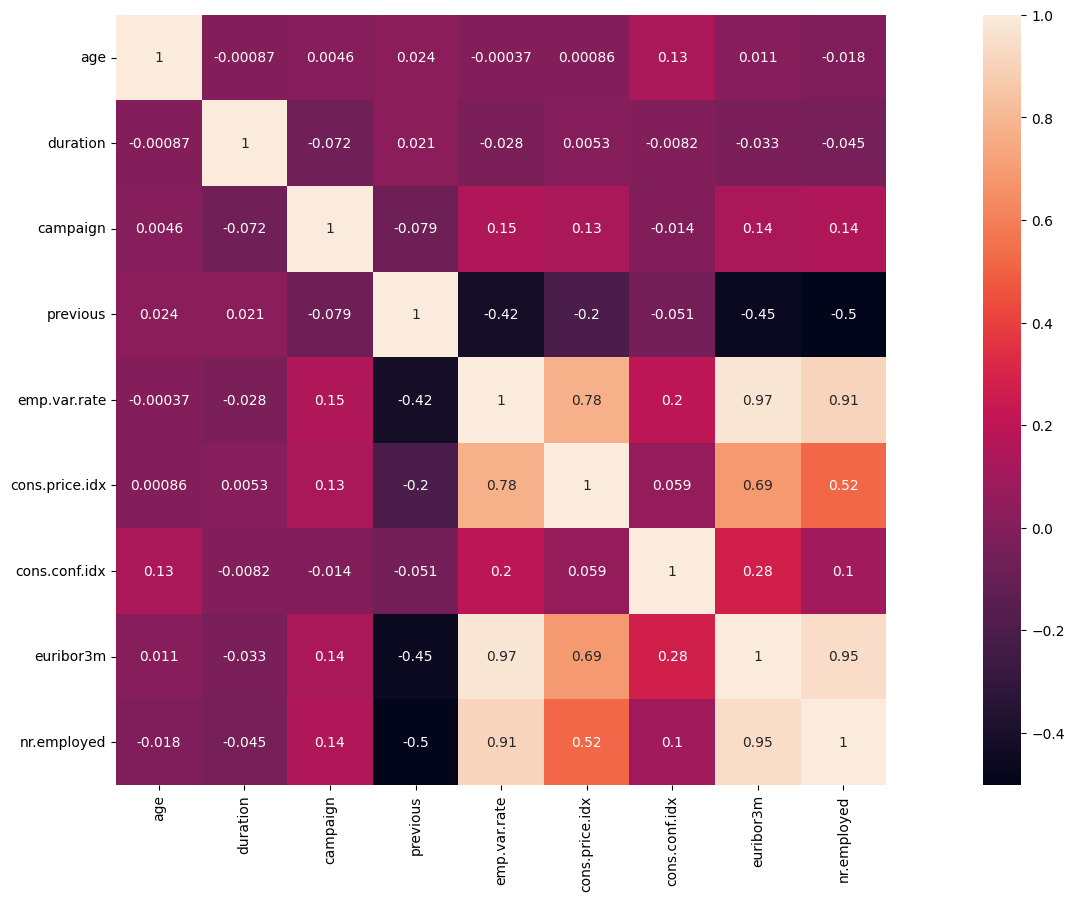

In [87]:
print("Correlation Matrix\n")

numeric_df = df.select_dtypes(include=['number'])   # keep only numeric columns
correlation = numeric_df.corr(method="pearson")

plt.figure(figsize=(25,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True)
plt.show()

We apply the Heatmap method to determin correlation between the continuous variables.
The heatmap showed very strong positive correlations (0.97, 0.95, 0.91, 0.78) between these 4 veriables:
cons.price.idx, euribor3m, nr.employed, emp.var.rate.
When several features contain almost the same information, this creates: 
- Multicollinearity (Models (especially Logistic Regression) become unstable or overweight certain signals).
- Redundant information (Multiple features describe the same economic trend → adds noise and slows learning).
- Risk of overfitting (Model memorizes redundant patterns rather than learning true relationships).

In this case, those 4 economic indicators are closely related, they all describe economic health. 
When the economy changes, they all move together. So instead of 4 separate but highly correlated columns 
we apply Factor Analysis method and create 1 new feature: X_factor. 
This single factor captures most of the information from all 4 original variables.
After this process we dropped these columns.



In [ ]:
# FactorAnalysis: 1 factor

high_corr_cols = ['cons.price.idx', 'euribor3m', 'nr.employed', 'emp.var.rate'] # List of highly correlated columns

fa = FactorAnalysis(n_components=1, random_state=42)

X_factor = fa.fit_transform(df[high_corr_cols])# Fit FactorAnalysis and transform the data

df['X_factor'] = X_factor # Add the new factor as a column


df = df.drop(columns=high_corr_cols)# Drop the original correlated columns

df.head()# Check the result

""" Do we need to scale the data (4 features) before factor analysis? """

C:\Users\elenl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\decomposition\_factor_analysis.py:296: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn(


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.conf.idx,y,pdays_cat,X_factor
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,-36.4,no,0,-0.709946
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,-36.4,no,0,-0.709946
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,-36.4,no,0,-0.709946
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,-36.4,no,0,-0.709946
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,-36.4,no,0,-0.709946


One-Hot Encoding


We applied One Hot Encoding method to categorical data with using get dummies function. One hot encoding is a process by which categorical variables are converted into matrix form with 1 and 0 values.

In [ ]:
'''columns = df.select_dtypes(include=[object]).columns
df = pd.concat([df, pd.get_dummies(df[columns])], axis=1)
df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome', 'y','duration'], axis =1)
print("\n","Describe Dataset_v2","\n")
print(df.info(),"\n \n \n") '''

SyntaxError: incomplete input (1570931332.py, line 6)

Data Normalization


We normalized our numerical data as data preparation. The goal of normalization is to change the values of numeric columns in the data set to use a common scale, without distorting differences in the ranges of values or losing information. We used MinMaxScaler function.

Test-Train Data Split

First step is spliting data into two and selected  %80 of data as Training set and %20 of data as Test Set.

Our dataset is imbalanced, it’s important to preserve the class proportions in both the training and test sets. 
We can do this using the stratify parameter in train_test_split.

In [104]:
X = df.drop('y', axis=1) #define feature matrix X and target vector y
y = df['y'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #checking the shape of the splits

(32950, 19) (8238, 19) (32950,) (8238,)


Logistic Regression

K Nearest Neighbors

Random Forest